In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx

# I.
Generate a random adjacency matrix for a simple undirected weighted graph of
100 vertices and 500 edges with assigned random positive integer weights (note that
the matrix should be symmetric and contain only 0s and weights as elements). Use
Dijkstra's and Bellman-Ford algorithms to find shortest paths between a random
starting vertex and other vertices. Measure the time required to find the paths for
each algorithm. Repeat the experiment 10 times for the same starting vertex and
calculate the average time required for the paths search of each algorithm. Analyse
the results obtained.

In [336]:
# Generate a random adjacency matrix for a simple undirected weighted graph
# of 100 vertices and 500 edges with assigned random positive integer weights
import networkx as nets
from networkx.generators.random_graphs import *
n = 100
p = 500
g = gnm_random_graph(n, p)
for u,v,w in g.edges(data=True):
     w['weight'] = np.random.randint(1,15)
matrix = nets.adjacency_matrix(g).todense()

In [337]:
matrix[:15, :15]

matrix([[ 0,  0,  0,  0,  0, 10,  3,  0,  0,  4,  0,  0,  0,  0,  0],
        [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
        [ 0,  0,  0, 13,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
        [ 0,  0, 13,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
        [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  7,  0,  0,  0,  0],
        [10,  0,  0,  0,  0,  0, 14,  0,  0,  0,  0,  0,  0,  0,  0],
        [ 3,  0,  0,  0,  0, 14,  0,  0,  0,  0,  0,  0,  0,  0,  0],
        [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
        [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  9,  0,  0,  0,  0],
        [ 4,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
        [ 0,  0,  0,  0,  7,  0,  0,  0,  9,  0,  0,  5,  0,  0,  0],
        [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  5,  0,  0,  0,  0],
        [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
        [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
        [ 0,  0,  0,

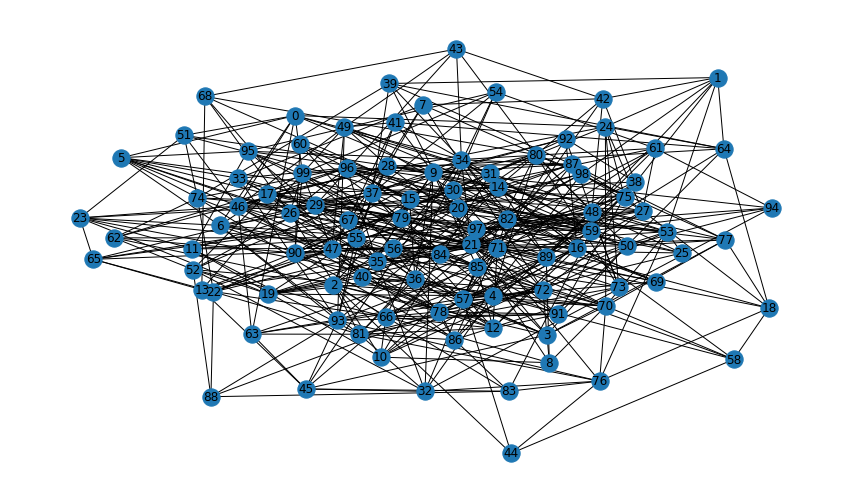

In [338]:
fig, ax = plt.subplots(figsize=(15, 9))
nets.draw(g, ax=ax, with_labels=True)

In [339]:
import time
import random
first_vertex = random.randint(0, len(g))
goal_vertexes = list(range(len(g)))
goal_vertexes.pop(first_vertex)

90

In [340]:
# https://networkx.org/documentation/networkx-1.10/reference/generated/networkx.algorithms.shortest_paths.weighted.dijkstra_path.html
# Dijkstra path
# Use Dijkstra's and Bellman-Ford algorithms to find shortest paths between a random starting vertex and other vertices.
# Measure the time required to find the paths for each algorithm. Repeat the experiment 10 times for the same starting vertex
# and calculate the average time required for the paths search of each algorithm.
max_iter = 10
def experiment(path_searcher, g, max_iter):
    timing = np.zeros(len(g))
    path_lens = np.zeros(len(g))
    for goal in goal_vertexes:
        start_time = time.time()
        for _ in range(max_iter):
            path_lens[goal] = len(path_searcher(g,first_vertex,goal))
        timing[goal] = time.time()-start_time
    return timing, path_lens
        
d_timing, d_path_lens = experiment(nets.dijkstra_path, g, max_iter)

In [341]:
d_path_lens

array([ 4.,  4.,  7.,  3.,  2.,  6.,  5., 10.,  4.,  3.,  3.,  4.,  5.,
        4.,  4.,  8.,  4.,  4.,  5.,  4.,  3.,  3.,  3.,  3.,  3.,  5.,
        4.,  6.,  6.,  3.,  2.,  2.,  4.,  3.,  4.,  5.,  3.,  6.,  6.,
        5.,  6.,  3.,  7.,  5.,  4.,  4.,  5.,  3.,  3.,  4.,  4.,  4.,
        5.,  5.,  6.,  7.,  4.,  4.,  3.,  4.,  2.,  6.,  7.,  5.,  4.,
        3.,  5.,  2.,  5.,  4.,  5.,  3.,  9.,  6.,  5.,  3.,  4.,  5.,
        8.,  4.,  5.,  6.,  5.,  3.,  4.,  2.,  2.,  4.,  6.,  4.,  0.,
        5.,  7.,  5.,  5.,  3.,  4.,  5.,  3.,  4.])

In [342]:
d_timing

array([0.00199461, 0.00997329, 0.00199413, 0.00299263, 0.00099826,
       0.00621915, 0.00777483, 0.00894952, 0.00797319, 0.        ,
       0.00202775, 0.00598454, 0.00713587, 0.00084066, 0.00839376,
       0.00753093, 0.        , 0.0080061 , 0.00599051, 0.00299501,
       0.00099349, 0.00495434, 0.00305104, 0.00293756, 0.00398374,
       0.0059855 , 0.00801349, 0.00498319, 0.00395775, 0.00703597,
       0.00197697, 0.00099826, 0.        , 0.00404811, 0.00691724,
       0.00498605, 0.00399065, 0.00998759, 0.0059731 , 0.00395226,
       0.00702214, 0.00030494, 0.00663519, 0.00801492, 0.00511503,
       0.00582075, 0.00798082, 0.00199103, 0.00398922, 0.00706863,
       0.00493288, 0.00495291, 0.00199556, 0.00399899, 0.00600839,
       0.0054574 , 0.00248957, 0.00299168, 0.00203848, 0.00198698,
       0.00298548, 0.00642395, 0.00680208, 0.00372839, 0.00199747,
       0.00099468, 0.00416851, 0.00078964, 0.00303936, 0.00409484,
       0.00287008, 0.00196028, 0.00700212, 0.00696015, 0.00398

In [343]:
np.corrcoef(d_path_lens, d_timing)

array([[1.        , 0.42776424],
       [0.42776424, 1.        ]])

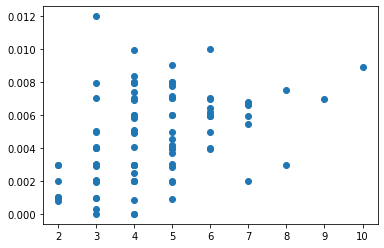

In [344]:
plt.scatter(d_path_lens[d_path_lens>0], d_timing[d_path_lens>0])

In [345]:
d_timing.mean()

0.004637947082519531

In [346]:
# https://networkx.org/documentation/networkx-1.10/reference/generated/networkx.algorithms.shortest_paths.weighted.dijkstra_path.html
# Bellman Ford path
# Use Dijkstra's and Bellman-Ford algorithms to find shortest paths between a random starting vertex and other vertices.
# Measure the time required to find the paths for each algorithm. Repeat the experiment 10 times for the same starting vertex
# and calculate the average time required for the paths search of each algorithm.
max_iter = 10
b_timing, b_path_lens = experiment(nets.dijkstra_path, g, max_iter)

In [347]:
np.corrcoef(b_path_lens, b_timing)

array([[1.        , 0.49410443],
       [0.49410443, 1.        ]])

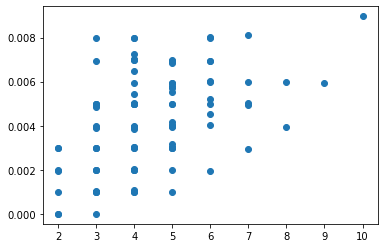

In [348]:
plt.scatter(b_path_lens[b_path_lens>0], b_timing[b_path_lens>0])

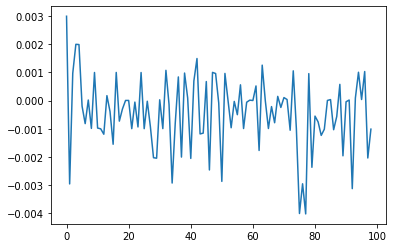

In [349]:
plt.plot(b_timing[b_path_lens>0]-d_timing[d_path_lens>0])

In [350]:
((b_timing[b_path_lens>0]-d_timing[d_path_lens>0])**2).mean()

1.82635944333419e-06

In [351]:
b_timing[b_path_lens>0].mean()

0.004241187163073607

# II.
Generate a 10x20 cell grid with 40 obstacle cells. Choose two random nonobstacle
cells and find a shortest path between them using A* algorithm. Repeat the
experiment 5 times with different random pair of cells. Analyse the results obtained.

In [237]:
N, M = 10, 20
def iswall(node, walls, n, m):
    if node[0]*m+node[1] in walls:
        return True
    return False

def create_grid(n, m, n_walls = 40):
    grid = nx.grid_2d_graph(n, m)
    layout = np.zeros((n, m)).flatten()
    
    walls = np.random.choice(range(len(grid.nodes)), n_walls, replace=False)
    
    for (u,v,w) in grid.edges(data=True):
        if iswall(u, walls, n, m) or iswall(v, walls, n, m):
            w['weight'] = np.inf
        else:
            w['weight'] = 1
    
    for i in range(layout.shape[0]):
        if i in walls:
            layout[i] = -1
    
    picture = '\n'.join([''.join(['.' if s == 0 else '#' for s in row]) for row in layout.reshape((n,m))])
    
    return grid, layout, picture

grid, layout, picture = create_grid(N, M)
print(picture)

..#.##...###.....#..
#...##....#.#.#.....
...#.#..##....#.....
......#.............
##.......#...#..###.
..................#.
..........#..#..#...
###.#.#...#.....#..#
...#................
.............#......


In [238]:
def print_path(picture, path):
    l = [list(s) for s in picture.split('\n')]
    for (i, j) in path:
        l[i][j]="*"
    l = '\n'.join([''.join(s) for s in l])
    print(l)
print_path(picture, nx.astar_path(grid,(0,0),(0,15)))

**#.##...###.***.#..
#*..##....#.#*#.....
.*.#.#..##****#.....
.**...#****.........
##******.#...#..###.
..................#.
..........#..#..#...
###.#.#...#.....#..#
...#................
.............#......


In [352]:
#     choosing start places
n_experiments = 5
starts = []
while len(starts)<n_experiments:
    i = np.random.randint(0, layout.shape[0])
    if layout[i]==0:
        starts.append(i)

stops = []
while len(stops)<n_experiments:
    i = np.random.randint(0, layout.shape[0])
    if layout[i]==0 and i != starts[len(stops)]:
        stops.append(i)
        
timing = []
lens = []
for i in range(n_experiments):
    start = list(grid.nodes)[starts[i]]
    stop  = list(grid.nodes)[stops[i]]
    start_time = time.time()
    for _ in range(100):
        result = nx.astar_path(grid,start,stop)
    timing.append(time.time()-start_time)
    lens.append(len(result))
    print("\n=====\nExperiment #{}.\nFrom {} to {}\nPath lengh: {}\nTime:{}\n-----\n".format(i+1, start, stop, lens[-1], timing[-1]))
    print_path(picture, result)


=====
Experiment #1.
From (8, 8) to (1, 1)
Path lengh: 15
Time:0.10275816917419434
-----

..#.##...###.....#..
#**.##....#.#.#.....
..*#.#..##....#.....
..****#.............
##...****#...#..###.
........*.........#.
........*.#..#..#...
###.#.#.*.#.....#..#
...#....*...........
.............#......

=====
Experiment #2.
From (3, 15) to (4, 8)
Path lengh: 9
Time:0.04487919807434082
-----

..#.##...###.....#..
#...##....#.#.#.....
...#.#..##....#.....
......#.********....
##......*#...#..###.
..................#.
..........#..#..#...
###.#.#...#.....#..#
...#................
.............#......

=====
Experiment #3.
From (5, 8) to (9, 8)
Path lengh: 5
Time:0.014768362045288086
-----

..#.##...###.....#..
#...##....#.#.#.....
...#.#..##....#.....
......#.............
##.......#...#..###.
........*.........#.
........*.#..#..#...
###.#.#.*.#.....#..#
...#....*...........
........*....#......

=====
Experiment #4.
From (8, 2) to (8, 9)
Path lengh: 10
Time:0.016954421997070312
-----

..#.#

In [357]:
sum(timing)/5

0.050629377365112305

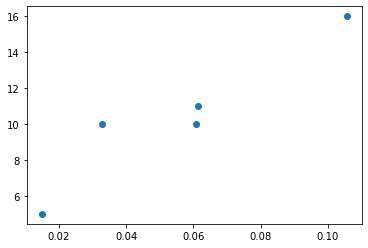

In [270]:
plt.scatter(timing, lens)

In [358]:
#     choosing start places
n_experiments = 100
starts = []
while len(starts)<n_experiments:
    i = np.random.randint(0, layout.shape[0])
    if layout[i]==0:
        starts.append(i)

stops = []
while len(stops)<n_experiments:
    i = np.random.randint(0, layout.shape[0])
    if layout[i]==0 and i != starts[len(stops)]:
        stops.append(i)
        
timing = []
lens = []
for i in range(n_experiments):
    start = list(grid.nodes)[starts[i]]
    stop  = list(grid.nodes)[stops[i]]
    start_time = time.time()
    for _ in range(100):
        result = nx.astar_path(grid,start,stop)
    timing.append(time.time()-start_time)
    lens.append(len(result))
#     print("\n=====\nExperiment #{}.\nFrom {} to {}\nPath lengh: {}\nTime:{}\n-----\n".format(i+1, start, stop, lens[-1], timing[-1]))
#     print_path(picture, result)

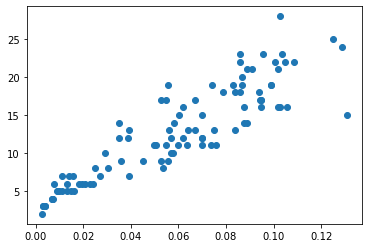

In [359]:
plt.scatter(timing, lens)

In [360]:
np.corrcoef(timing, lens)

array([[1.        , 0.89489964],
       [0.89489964, 1.        ]])